In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_rows", 500)

In [2]:
import bambi as bmb

In [3]:
import numpyro

In [4]:
import pymc as pm
import arviz as az

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
data_frame = pd.read_table("tbl.txt", delimiter="\s+")

In [7]:
data_frame

,subject,ROI,y,x
0,HMN001,RPCC,0.3457,17.76
1,HMN002,RPCC,0.5166,17.05
2,HMN003,RPCC,0.0919,15.81
3,HMN004,RPCC,0.3635,15.19
4,HMN005,RPCC,0.7323,17.31
...,...,...,...,...
2599,HMN194,vmPFC,0.1730,18.93
2600,HMN196,vmPFC,0.2926,19.31
2601,HMN197,vmPFC,0.1925,18.00
2602,HMN199,vmPFC,0.3157,15.26


In [8]:
model = bmb.Model("y ~ x + (1|subject) + (x|ROI)", data_frame)

In [36]:
results = model.fit(
    tune=4000, 
    draws=1000, 
    chains=8, 
    method="nuts_numpyro", 
    nuts_kwargs=dict(max_tree_depth=100),
)

Compiling...
Compilation time =  0:00:03.724621
Sampling...


  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

Sampling time =  0:00:40.162220
Transforming variables...
Transformation time =  0:00:00.283781


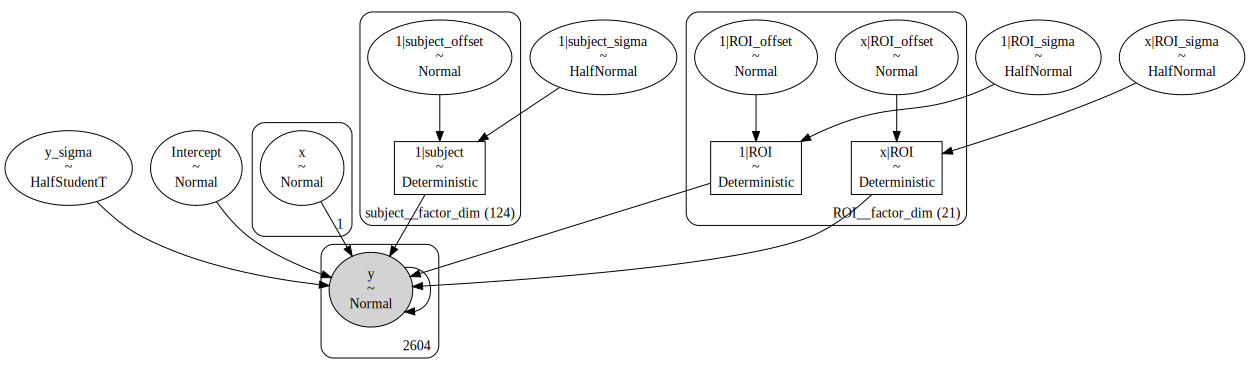

In [33]:
model.graph()

In [34]:
results

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [37]:
number_of_divergences = int(results.sample_stats.diverging.sum())
number_of_divergences

0

In [38]:
bool(np.all((0.9 <= az.rhat(results) <= 1.05).to_array()))

True

In [15]:
az.summary(results)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.054,0.065,-0.069,0.176,0.001,0.001,2181.0,3719.0,1.0
x,0.007,0.004,-0.001,0.015,0.000,0.000,2048.0,3666.0,1.0
1|subject_sigma,0.077,0.006,0.066,0.089,0.000,0.000,2530.0,2534.0,1.0
1|ROI_sigma,0.074,0.034,0.003,0.130,0.001,0.001,1555.0,1713.0,1.0
x|ROI_sigma,0.009,0.002,0.006,0.012,0.000,0.000,2798.0,4273.0,1.0
y_sigma,0.153,0.002,0.149,0.157,0.000,0.000,10357.0,6009.0,1.0
1|subject[HMN001],0.057,0.031,-0.002,0.116,0.000,0.000,11657.0,5775.0,1.0
1|subject[HMN002],0.051,0.031,-0.008,0.108,0.000,0.000,11060.0,5647.0,1.0
1|subject[HMN003],0.000,0.032,-0.058,0.061,0.000,0.000,10508.0,5744.0,1.0
1|subject[HMN004],-0.088,0.032,-0.149,-0.031,0.000,0.000,8628.0,5920.0,1.0


In [ ]:
_ = az.plot_trace(results, figsize=(20, 35))

In [46]:
sample_frame = results["posterior"]["x|ROI"].stack(y=["draw", "chain"]).to_pandas().transpose()

In [49]:
sample_frame.reset_index(inplace=True)

In [50]:
sample_frame

ROI__factor_dim,draw,chain,ACC,LAmy/Hippo,LCing,LIFG,LIPL,LMTG,LSFG,LTPJ,...,RAmy/Hippo,RIFG_BA45,RIFG_BA9,RIns,RPCC,RTPJp,RvBG,SGC,dmMPFC,vmPFC
0,0,0,-0.010695,-0.008134,-0.014992,-0.009796,0.003603,-0.001939,-0.004810,0.006834,...,-0.004187,-0.005564,-0.003937,-0.007552,0.010234,0.031353,-0.006321,-0.007327,-0.000511,-0.003715
1,0,1,-0.002013,-0.003709,-0.002448,-0.001720,0.005571,-0.005693,-0.000702,0.013438,...,-0.003605,-0.002402,0.000092,-0.003852,0.013609,0.011907,0.001897,-0.004217,0.001925,0.003396
2,0,2,-0.006694,0.002950,-0.003497,-0.001823,0.011083,-0.000167,0.001206,0.011488,...,-0.007433,-0.006098,-0.012347,-0.011778,0.010089,0.011941,-0.009018,0.003037,0.003127,-0.003641
3,0,3,-0.000876,-0.003906,-0.004926,-0.010739,0.000019,-0.010054,-0.002554,0.006410,...,-0.005483,-0.005760,-0.005541,-0.003116,0.006522,0.014354,-0.003270,-0.000937,-0.000358,0.003343
4,0,4,-0.005583,-0.008253,-0.010550,0.000068,-0.001252,-0.001652,-0.001108,0.009022,...,-0.008035,-0.005116,-0.006883,-0.008417,0.011356,0.020262,-0.004668,-0.002549,0.000760,0.003656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,999,11,-0.007034,-0.004224,-0.014528,-0.009185,0.002745,-0.000273,-0.004441,0.007418,...,-0.004063,-0.007413,-0.005800,-0.004469,0.010120,0.029713,-0.003989,-0.006888,-0.000503,-0.002218
15996,999,12,-0.002164,-0.005878,-0.003454,-0.004217,0.006823,0.004227,0.007275,0.006520,...,-0.003074,-0.003785,-0.008335,-0.004459,0.010221,0.017118,-0.005651,-0.000691,0.001324,0.001231
15997,999,13,-0.001947,-0.002335,-0.008087,-0.002408,0.010143,0.001916,0.002659,0.012860,...,0.002791,-0.000150,-0.000390,0.005769,0.017976,0.031910,0.004032,0.000773,0.005465,0.003096
15998,999,14,-0.004338,-0.008323,-0.012995,-0.009232,-0.001154,-0.000266,-0.005939,0.006934,...,-0.005122,-0.006606,-0.010178,-0.003517,0.009843,0.018538,-0.006108,-0.004328,0.001868,-0.002963


In [117]:
melt_frame = sample_frame.melt(id_vars=["draw", "chain"]).rename(columns=dict(ROI__factor_dim="ROI"))

In [118]:
melt_frame

,draw,chain,ROI,value
0,0,0,ACC,-0.010695
1,0,1,ACC,-0.002013
2,0,2,ACC,-0.006694
3,0,3,ACC,-0.000876
4,0,4,ACC,-0.005583
...,...,...,...,...
335995,999,11,vmPFC,-0.002218
335996,999,12,vmPFC,0.001231
335997,999,13,vmPFC,0.003096
335998,999,14,vmPFC,-0.002963


<AxesSubplot:xlabel='value', ylabel='Density'>

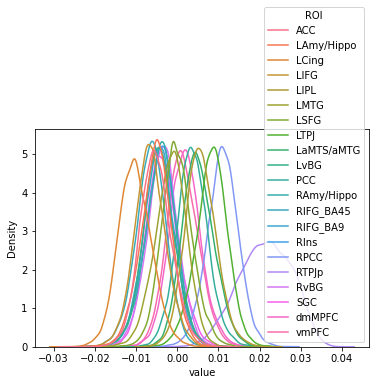

In [119]:
sns.kdeplot(x="value", hue="ROI", data=melt_frame)

In [151]:
means = melt_frame.groupby(["ROI"]).value.mean().sort_values(ascending=False)
means

ROI
RTPJp         0.021336
RPCC          0.011067
LTPJ          0.008371
LIPL          0.005733
LaMTS/aMTG    0.005160
PCC           0.003730
dmMPFC        0.001956
vmPFC         0.001412
LSFG         -0.000014
LMTG         -0.001577
RvBG         -0.003572
SGC          -0.003606
RAmy/Hippo   -0.004040
RIns         -0.004136
LvBG         -0.004434
RIFG_BA9     -0.004536
LAmy/Hippo   -0.005146
ACC          -0.005183
RIFG_BA45    -0.006350
LIFG         -0.006567
LCing        -0.010202
Name: value, dtype: float64

In [175]:
melt_frame["mean"] = np.nan
for label, mean in means.items():
    melt_frame.loc[melt_frame.ROI == label, "mean"] = mean * 1000

In [176]:
melt_frame

,draw,chain,ROI,value,mean
0,0,0,ACC,-0.010695,-5.182582
1,0,1,ACC,-0.002013,-5.182582
2,0,2,ACC,-0.006694,-5.182582
3,0,3,ACC,-0.000876,-5.182582
4,0,4,ACC,-0.005583,-5.182582
...,...,...,...,...,...
335995,999,11,vmPFC,-0.002218,1.411533
335996,999,12,vmPFC,0.001231,1.411533
335997,999,13,vmPFC,0.003096,1.411533
335998,999,14,vmPFC,-0.002963,1.411533


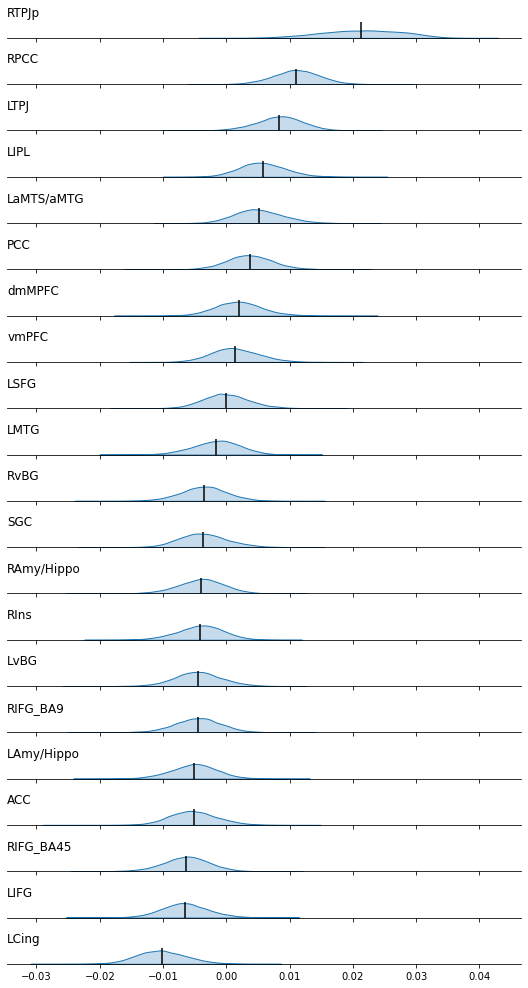

In [181]:
g = sns.FacetGrid(
    melt_frame, 
    row="ROI",
    row_order=means.index, 
    sharex=True, 
    height=2 / 3, 
    aspect=12
)

g.map_dataframe(sns.kdeplot, x="value", fill=True)

g.set_axis_labels("")

axes = g.axes.ravel()
for i, (label, ax, mean) in enumerate(zip(order, axes, means)):
    ax.set_title("")
    ax.set_title(label, loc="left")
    
    ax.spines["left"].set_visible(False)
    ax.set_ylabel("")
    ax.set_yticks([])
    
    ax.axvline(x=mean, color="black")

In [179]:
cmap.__dict__

{'monochrome': False,
 'colors': array([[0.76805788, 0.88417562, 0.89908506, 1.        ],
        [0.76253291, 0.88079348, 0.89664309, 1.        ],
        [0.76253291, 0.88079348, 0.89664309, 1.        ],
        ...,
        [0.12773581, 0.14704718, 0.25329666, 1.        ],
        [0.12773581, 0.14704718, 0.25329666, 1.        ],
        [0.12477747, 0.14301385, 0.24734758, 1.        ]]),
 'name': 'seaborn_cubehelix',
 'N': 256,
 '_rgba_bad': (0.0, 0.0, 0.0, 0.0),
 '_rgba_under': None,
 '_rgba_over': None,
 '_i_under': 256,
 '_i_over': 257,
 '_i_bad': 258,
 '_isinit': True,
 'colorbar_extend': False,
 '_lut': array([[0.76805788, 0.88417562, 0.89908506, 1.        ],
        [0.76253291, 0.88079348, 0.89664309, 1.        ],
        [0.76253291, 0.88079348, 0.89664309, 1.        ],
        ...,
        [0.76805788, 0.88417562, 0.89908506, 1.        ],
        [0.12477747, 0.14301385, 0.24734758, 1.        ],
        [0.        , 0.        , 0.        , 0.        ]])}

[<AxesSubplot:title={'center':'ROI__factor_dim = RTPJp'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = RPCC'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = LTPJ'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = LIPL'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = LaMTS/aMTG'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = PCC'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = dmMPFC'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = vmPFC'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = LSFG'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = LMTG'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = RvBG'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = SGC'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = RAmy/Hippo'}, ylabel='Density'>

AttributeError: 'numpy.ndarray' object has no attribute 'spines'